<a href="https://colab.research.google.com/github/giordanap/luchin-model/blob/master/ML_GAP_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt ## Todo lo referente a gráficas y demás.
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.
import math

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as metrics

from plot_metric.functions import BinaryClassification

%matplotlib inline

In [ ]:
def formRUTA(ruta):
    if ruta[len(ruta)-1] != '\\':
        ruta = ruta + '\\'
        ruta = ruta.replace('\\', '/')
        return ruta
    elif ruta[len(ruta)-1] != '/':
        ruta = ruta + '/'
        return ruta

In [ ]:
ruta = input()
ruta = formRUTA(ruta)
# D:\Users\Usiario-Acceso\Downloads

D:\Users\Usiario-Acceso\Downloads


In [ ]:
df = pd.read_csv(ruta + "/" + "train.csv")

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
## Aquí hay algunas conclusiones importantes

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [ ]:
# Tabla Resumen
df.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002784,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025967D999C8>],
      dtype=object)

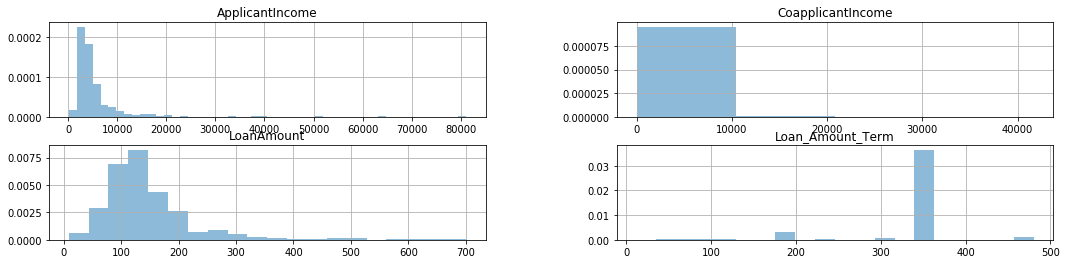

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (18, 4))
# outliers
green_diamond = dict(markerfacecolor='g', marker='D')
red_square = dict(markerfacecolor='r', marker='s')

# BOXPLOTS
# df.boxplot(ax=axes[0], column=["EDAD"],by='CHURN', vert=False,grid = False, figsize = (1, 1))
# df.boxplot(ax=axes[1], column=["HIJOS"],by='CHURN', vert=False, grid = False, figsize = (1, 1))
# df.boxplot(ax=axes[2], column=["INGRESO"],by='CHURN', vert=False, grid = False, figsize = (1, 1))
# # HISTOGRAMS
df.hist(ax=axes[0,0], column=["ApplicantIncome"], normed=True, bins=50, alpha=0.5, figsize = (10, 6))
df.hist(ax=axes[0,1], column=["CoapplicantIncome"], normed=True, bins=4, alpha=0.5, figsize = (10, 6))
df.hist(ax=axes[1,0], column=["LoanAmount"], normed=True, bins=20, alpha=0.5, figsize = (10, 6))
df.hist(ax=axes[1,1], column=["Loan_Amount_Term"], normed=True, bins=20, alpha=0.5, figsize = (10, 6))

In [ ]:
# Para ver las variables con valores perdidos 
df_null_col = df.isnull().any(axis = 0)
df_null_col = df_null_col[df_null_col == True].index.tolist()
df_null_col

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [ ]:
def graph_nulos(base,lim=0.1):
  
  # columnas nulos
  null_col = base.isnull().any(axis = 0)
  null_col = null_col[null_col == True].index.tolist()

  # Niveles alto de nulos
  df_nulos_graph = base[null_col].isnull().sum(axis = 0).round(4)
  df_nulos_graph = df_nulos_graph.sort_values()/base.shape[0]
  df_nulos_graph = pd.DataFrame(df_nulos_graph,columns=["nulos"])
  a = df_nulos_graph
  # por defecto el límite de nulos por variable es del 10% 
  a['nulos'] = np.where(a['nulos'] > lim,
                        a['nulos'],0) 
  a = a.reset_index()
  
  # Niveles medio de nulos
  df_nulos_graph = base[null_col].isnull().sum(axis = 0).round(4)
  df_nulos_graph = df_nulos_graph.sort_values()/base.shape[0]
  df_nulos_graph = pd.DataFrame(df_nulos_graph,columns=["nulos"])
  b = df_nulos_graph
  b['nulos'] = np.where(b['nulos'] <= lim,
                        b['nulos'],0)
  b = b.reset_index() 

  fig, ax = plt.subplots()

  # Generamos las barras para los 
  plt_graph_a = ax.barh(a["index"],a["nulos"],label = "Alto")
  plt_graph_b = ax.barh(b["index"],b["nulos"],label = "Medio",color = 'g')
  ax.set_xlabel('Porcentaje de Nulos')
  ax.set_title('Análisis de Missing')

  df_nulos_graph = base[null_col].isnull().sum(axis = 0).round(4)
  df_nulos_graph = df_nulos_graph.sort_values()/base.shape[0]
  df_nulos_graph = pd.DataFrame(df_nulos_graph,columns=["nulos"])
  maximo = df_nulos_graph["nulos"].max()
  
  if lim == 0.1:
    if maximo > lim:
      ax.axvline(lim, color='r', ls="dotted")
  else:
    ax.axvline(lim, color='r', ls="dotted")
  
  if math.isnan(maximo): 
      True 
  else:
      ax.legend()

  plt.show()

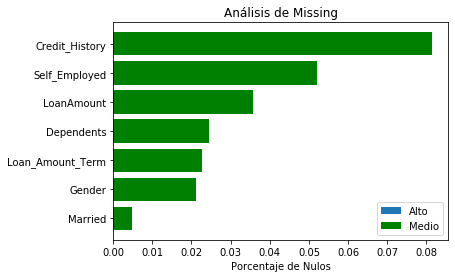

In [ ]:
graph_nulos(df)

In [ ]:
# Visualizamos los valores perdidos respecto a las variables cualititativas
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [ ]:
# Lista de variables numéricas y categóricas:
def var_num_cat(base,tipo = "num"):
  base_types = pd.DataFrame(base.dtypes,columns=["type"])
  a = np.isin(base_types["type"],[["float64","int64","int32"]])
  if tipo == "num":
    col = base_types[a].index.tolist()
  else:
    col = base_types[~a].index.tolist()
  return col

In [ ]:
col_num=var_num_cat(df,'num')

In [ ]:
col_cat=var_num_cat(df,'cat')
col_cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
# imputacion de categóricas por la moda:
def imput_cat_moda(base):
  cat = var_num_cat(base,"cat")
  nulos = base[cat].isnull().any(axis = 0)
  nulos = nulos[nulos == True].index.tolist()
  for i in nulos: base[i] = base[i].fillna(base[i].mode()[0])

In [ ]:
# Imputamos los valores cualitativos por Moda
imput_cat_moda(df)

# df.Gender = df.Gender.fillna("Male")
# df.Married = df.Married.fillna("Yes")
# df.Self_Employed = df.Self_Employed.fillna("Yes")
# df.Credit_History = df.Credit_History.fillna("1")
# df.Dependents = df.Dependents.fillna("0")

In [ ]:
# Preprocesamiento con LabelEncoder

from sklearn.preprocessing import LabelEncoder # PasoN°01: Importo la libreria a usar
for c in col_cat:
    print(str(c))
    le = LabelEncoder()                        #   PasoN°02: Instancio la funcion a desarrollar
    le.fit(df[str(c)])                         #   PasoN°03: Ajusto la funcion
    df[str(c)]=le.transform(df[str(c)])        #   PasoN°04: Ejecuto la funcion

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [ ]:
df.Dependents = df.Dependents.astype('int32')

In [ ]:
# funcion para imputar columnas numéricas por la mediana:
def imput_num_mediana(base):
    num = var_num_cat(base)
    nulos = base[num].isnull().any()
    nulos = nulos[nulos == True].index.tolist()
    for i in nulos:
        # quitamos los nulos de la variable
        lista = [i for i in base[i] if str(i) != 'nan']
        largo = len(lista)
        if largo % 2 == 1 :
            mediana = lista[int((largo-1)/2)]
        else:
            mediana = (lista[int((largo/2)+1)] + lista[int(largo/2)])/2
        base[i].fillna(mediana, inplace=True)

In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
## Median
imput_num_mediana(df)

# for c in columnas_numericas:
#     median = desarrll[c].median()
#     desarrll[c].fillna(median, inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
########################################
## Feature Enginnering ##
########################################

In [ ]:
## Creación de Variables por Decision de Negocio o de acuerdo a metodologías más automatizadas es el
# corazon de Machine Learning
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de scoreo o data productiva.

In [ ]:
# Ingenieria de datos
#Creamos las variables para el entrenamiento o train

df['TotalIncome']    = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Log_LoanAmount'] = round(np.log(df['LoanAmount']+1),2)

In [ ]:
df['AmountxTerm']    = round(df['LoanAmount']/df['Loan_Amount_Term'],2)
df["Cuota_Ingreso1"] = (1000*df["LoanAmount"]/df["Loan_Amount_Term"])/(df["ApplicantIncome"])
df["Cuota_Ingreso2"] = (1000*df["LoanAmount"]/df["Loan_Amount_Term"])/(df["TotalIncome"])
df["Cuota_Ingreso_Hijo"] = (1000*df["LoanAmount"]/df["Loan_Amount_Term"])/(df["TotalIncome"]/(df ["Dependents"]+1))

In [ ]:
# Quitamos el ID
df= df.drop('Loan_ID',axis=1)

In [ ]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
x_train, x_test, y_train, y_test = train_test_split(df.drop('Loan_Status', axis=1), # (X,y,%test,estratificacion)
                                                    df['Loan_Status'], 
                                                    test_size=0.30,
                                                    stratify=df['Loan_Status'],
                                                    random_state=100)

In [ ]:
########################################
# Selección de Variables
########################################

In [ ]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso02: Configuro el algoritmo
forest.fit(x_train, y_train)                        # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_           # Variables importantes

In [ ]:
forest.feature_importances_

array([0.00945207, 0.01255779, 0.01835224, 0.01793813, 0.0162038 ,
       0.07253853, 0.04315676, 0.04234463, 0.02370239, 0.27615767,
       0.03072947, 0.08771594, 0.04917186, 0.05533565, 0.07517507,
       0.09656849, 0.07289952])

In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(x_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,Credit_History,0.276158
1,Cuota_Ingreso2,0.096568
2,TotalIncome,0.087716
3,Cuota_Ingreso1,0.075175
4,Cuota_Ingreso_Hijo,0.072900
5,ApplicantIncome,0.072539
6,AmountxTerm,0.055336
7,Log_LoanAmount,0.049172
8,CoapplicantIncome,0.043157
9,LoanAmount,0.042345


In [ ]:
# Instalamos Boruta
# ! pip install Boruta

In [ ]:
# Seleccion Boruta (Permutaciones de arboles)
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rfc = RandomForestClassifier()
boruta_selector = BorutaPy(rfc, n_estimators=20,verbose=2)

x=x_train.values
y=y_train.values

boruta_selector.fit(x,y)

print("==============BORUTA==============")
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	5
Rejected: 	12
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	4
Rejected: 	12
I

In [ ]:
# Observamos cual de las variables el algoritmo eligio
x_train_Bor = x_train.columns[boruta_selector.support_]

In [ ]:
x_train_Bor

Index(['Credit_History'], dtype='object')

In [ ]:
# Si deseamos , podemos elegir las variables mas importantes
x_train_subset =x_train[["Credit_History","Cuota_Ingreso1","Cuota_Ingreso_Hijo","LoanAmount"]]

In [ ]:
########################################
# Modelamiento de los datos
########################################

In [ ]:
## Modelos Supervisados : Arbol CART ##

In [ ]:
# Paso N°01: Llamar un algoritmo predictivos
from sklearn.tree import DecisionTreeClassifier
#Parámetros del árbol de clasificación
# criterion  , splitter ,max_depth,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,splitter
cart = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features="sqrt")
cart.fit(x_train, y_train) # Entrenamos el algoritmo

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=cart.predict(x_train) # Prediccion sobre el train
y_pred_test= cart.predict(x_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 71  63]
 [  9 286]]
Matriz confusion: Test
[[ 25  33]
 [  9 118]]
Accuracy: Train
0.8321678321678322
Accuracy: Test
0.772972972972973
Precision: Train
0.8194842406876791
Precision: Test
0.7814569536423841
Recall: Train
0.9694915254237289
Recall: Test
0.9291338582677166


In [ ]:
#! pip install --user plot_metric
#! pip install h5py

In [ ]:
# Instalamos la libreria plot_metric para visualizar nuestros resultados
from plot_metric.functions import BinaryClassification

In [ ]:
bc = BinaryClassification(y_test, y_pred_test, labels=["No Prestamo", "Prestamo"])

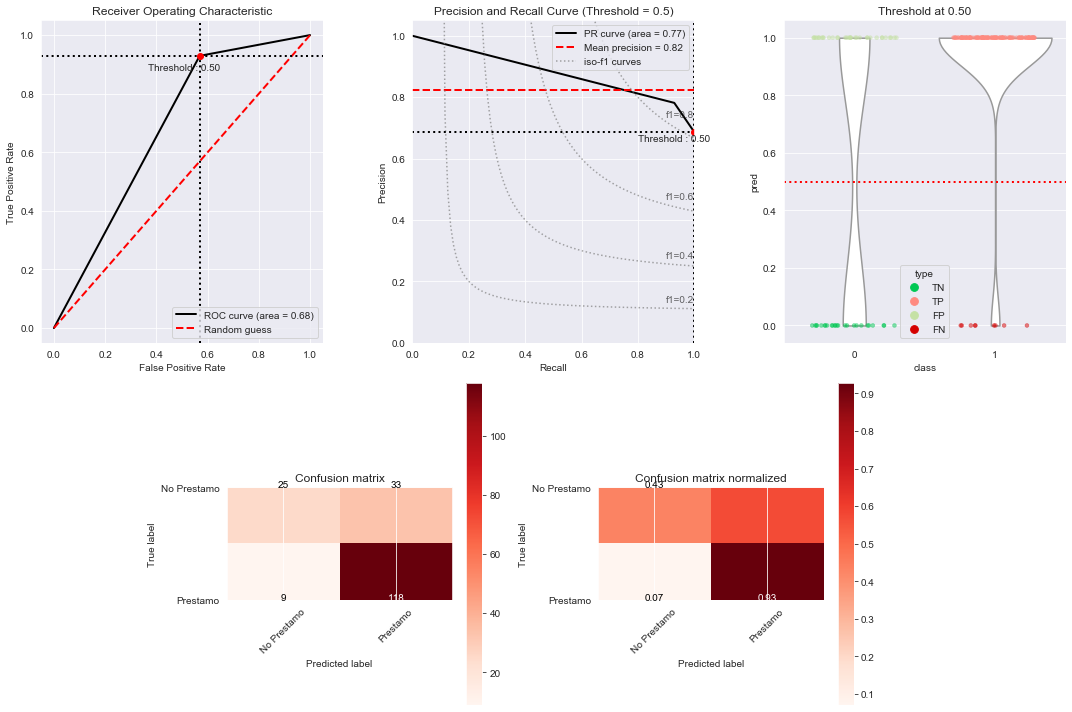

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

 No Prestamo       0.74      0.43      0.54        58
    Prestamo       0.78      0.93      0.85       127

    accuracy                           0.77       185
   macro avg       0.76      0.68      0.70       185
weighted avg       0.77      0.77      0.75       185



In [ ]:
# Grafico de Indicadores de Validacion
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()

In [ ]:
##################################################
## Implementación de Modelos de Machine Learning
##################################################

In [ ]:
# Leemos el dataset de implementacion, podria ser una informacion a enivar a campanas
implemt = pd.read_csv(ruta + "test.csv") 

In [ ]:
# Todo lo realizado en el dataset de entrenamiento del modelo lo debemos replicar en el dataset de scoring

In [ ]:
# Imputamos los valores cualitativos por Moda
imput_cat_moda(implemt)

# implemt.Gender = implemt.Gender.fillna("Male")
# implemt.Married = implemt.Married.fillna("Yes")
# implemt.Self_Employed = implemt.Self_Employed.fillna("Yes")
# implemt.Credit_History = implemt.Credit_History.fillna("1")
# implemt.Dependents = implemt.Dependents.fillna("0")

In [ ]:
col_num=var_num_cat(implemt,'num')
col_cat=var_num_cat(implemt,'cat')
col_cat=col_cat[1:len(col_cat)]

In [ ]:
# Preprocesamiento con LabelEncoder
for c in col_cat:
    print(str(c))
    le = LabelEncoder()
    le.fit(implemt[str(c)])
    implemt[str(c)]=le.transform(implemt[str(c)]) 

Gender
Married
Dependents
Education
Self_Employed
Property_Area


In [ ]:
implemt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null int32
Married              367 non-null int32
Dependents           367 non-null int32
Education            367 non-null int32
Self_Employed        367 non-null int32
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null int32
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 25.9+ KB


In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
## Median
imput_num_mediana(implemt)

# for c in columnas_numericas:
#     median = implemt[c].median()
#     implemt[c].fillna(median, inplace=True)

In [ ]:
implemt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
# Ingenieria de datos
#Creamos las mismas variables que utilizamos en el train
implemt['TotalIncome']    = implemt['ApplicantIncome'] + implemt['CoapplicantIncome']
implemt['Log_LoanAmount'] = round(np.log(implemt['LoanAmount']+1),2)

In [ ]:
implemt['AmountxTerm']    = round(implemt['LoanAmount']/implemt['Loan_Amount_Term'],2)
implemt["Cuota_Ingreso1"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["ApplicantIncome"] +1)
implemt["Cuota_Ingreso2"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["TotalIncome"] +1)
implemt["Cuota_Ingreso_Hijo"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["TotalIncome"]/(implemt["Dependents"]+1))

In [ ]:
## Una vez que tenemos todas las variables podemos scorear o puntuar los registros

In [ ]:
df_scoring = implemt.drop("Loan_ID",axis=1)

In [ ]:
df_scoring.Credit_History = df_scoring.Credit_History.astype('int')

In [ ]:
# Predecimos con la data nueva
y_scoring = cart.predict(df_scoring)

In [ ]:
# Predecimos sobre el set de datos de implementacion con el modelo entrenado
# Juntamos el ID con la clase
data = np.hstack((implemt['Loan_ID'].values.reshape(-1,1), y_scoring.reshape(-1,1)))
# Le asignamos nombres a las columnas
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
# Convertimos al formato solicitado por Analytics Vidhya
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
# Exportamos la solucion
df_submmit.to_csv(ruta+'Sol_Cart.csv', index=False)

In [ ]:
# Fin !!